In [41]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import circulant
# load the numpy txt from a file 
data = np.loadtxt('data/curves/dino_noisy.txt')
#data = np.vstack([data, [data[0, 0], data[0, 1]]]) # close the curve
data_not = np.loadtxt('data/curves/dino.txt')
true_data = np.loadtxt('data/curves/dino.txt') 
true_data = np.vstack([true_data, [true_data[0, 0], true_data[0, 1]]])
from IPython.display import display, clear_output
len(data)

200

In [ ]:
print(data)

[[-6.706905  7.271857]
 [-6.324829  6.930205]
 [-5.685407  7.293916]
 [-5.400542  6.771134]
 [-5.661264  6.279083]
 [-5.478646  5.908201]
 [-5.679459  5.523071]
 [-5.676586  5.145507]
 [-5.484042  4.787421]
 [-5.455985  4.418085]
 [-5.623052  4.00528 ]
 [-5.600122  3.616024]
 [-5.343715  3.299607]
 [-5.476104  2.888079]
 [-5.359428  2.364141]
 [-4.797185  2.452371]
 [-4.510782  2.71682 ]
 [-4.253624  3.080989]
 [-3.70785   2.867252]
 [-3.367427  3.020393]
 [-3.023469  3.184828]
 [-2.671068  3.343687]
 [-2.311907  3.492463]
 [-1.901737  3.229544]
 [-1.52859   3.045639]
 [-1.149619  3.546714]
 [-0.782871  3.259684]
 [-0.368934  3.376459]
 [ 0.065579  3.510691]
 [ 0.28188   2.818226]
 [ 0.691034  2.874406]
 [ 1.085498  2.829658]
 [ 1.292503  2.435126]
 [ 1.650338  2.241613]
 [ 2.185209  2.695994]
 [ 2.495258  2.340268]
 [ 2.829494  2.482365]
 [ 3.30226   2.408446]
 [ 3.461702  2.839053]
 [ 3.603749  3.168291]
 [ 3.659324  3.509005]
 [ 3.901586  3.84404 ]
 [ 3.868555  4.283739]
 [ 4.191414

: 

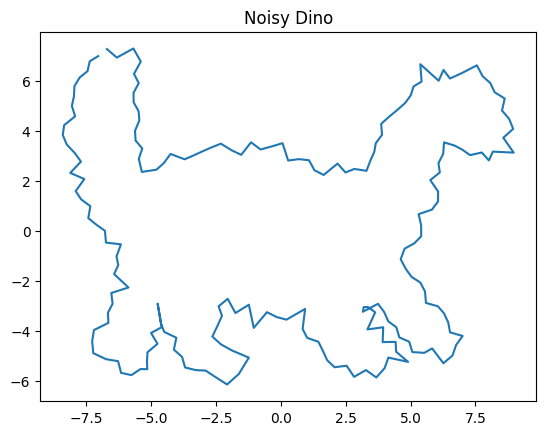

200


In [42]:
# plot the dino 
plt.figure()
# repeats the first point at the end to close the curve
#data_closed = np.vstack([data, data[0]])
plt.plot(data[:,0], data[:,1], '-')
plt.title("Noisy Dino")
plt.show()

print(len(data))

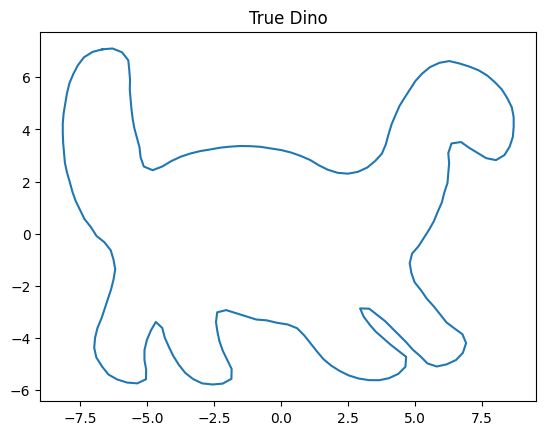

In [4]:
plt.figure()
# repeats the first point at the end to close the curve
plt.plot(true_data[:,0], true_data[:,1], '-')
plt.title("True Dino")
plt.show()


#### Trial hand implementation by myself wtaking the previous, currend and next elements and smoothing by their average. (Not an exercise)

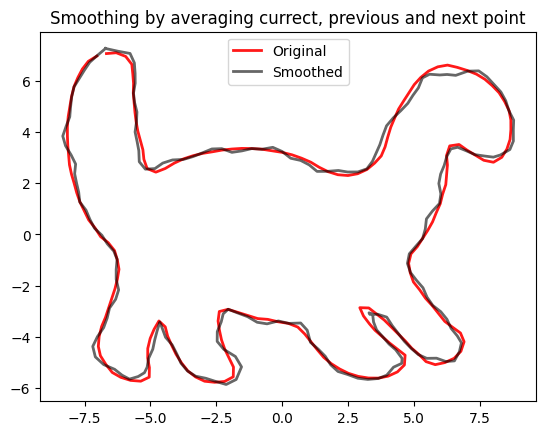

In [ ]:
# create a copy of the data 
#new_data = np.copy(data)
#new_data = np.vstack([data, data[0]])
#for i in range(1, data.shape[0] - 1):
#    # get a previous and next point
#    if i == 0:
#        prev = current
#    elif i == len(data) - 1:
#        next = current
#    prev = data[i-1]
#    next = data[i+1]
#    current = data[i]
#    data[i] = np.mean([prev, current, next], axis=0)
#
#
## plot the new and old 
#plt.figure()
#plt.title("Smoothing by averaging currect, previous and next point")
#plt.plot(true_data[:,0], true_data[:,1], '-', label="Original", alpha=0.9, color='red', linewidth=2)
#plt.plot(data[:,0], data[:,1], '-', label="Smoothed", color='black', linewidth=2, alpha=0.6)
#plt.legend()
#plt.show()
#
#

##### Scipy circulant matrix

The circulant matrix is a special kind of Toeplitz matrix where each row is rotated one element to the right relative to the preceding row. The circulant matrix is completely determined by the first row. The first row of the circulant matrix is the first row of the matrix, and the remaining rows are rotations of the first row. The circulant matrix is a special case of a Toeplitz matrix, where all the diagonals are constant. The circulant matrix is a special case of a Hankel matrix, where all the diagonals are constant.

- parameters: 
    - c (…, N,) array_like. The first column(s) of the matrix. Multidimensional arrays are treated as a batch: each slice along the last axis is the first column of an output matrix.
- Returns:
    - out (…, N, N) ndarray. A circulant matrix.
    A circulant matrix whose first column is given by c. For batch input, each slice of shape (N, N) along the last two dimensions of the output corresponds with a slice of shape (N,) along the last dimension of the input.

In [ ]:
## The matrix dimension 
#N = 200 
#
## fill the matrix with zeroes
#L = np.zeros(N)
## fill diagonals with -2
#L[0] = -2
## fill the row above the main diagonal with 1
#L[1] = 1
## fill the row below the main diagonal with 1
#L[-1] = 1
#
## create the matrix
#L = circulant(L)
#print(L)

[[-2.  1.  0. ...  0.  0.  1.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 1.  0.  0. ...  0.  1. -2.]]


Equation 1.10 

$$X_{new} = (\mathbf{I} + \lambda \mathbf{L}) \mathbf{X}$$

In [ ]:
#LAMBDA = 0.9         # Smoothing factor
#I = np.eye(N) # N x N identity matrix
#X_new = (I + LAMBDA*L) @ data

#### Applying the equation 1.10 to the data to smooth it.

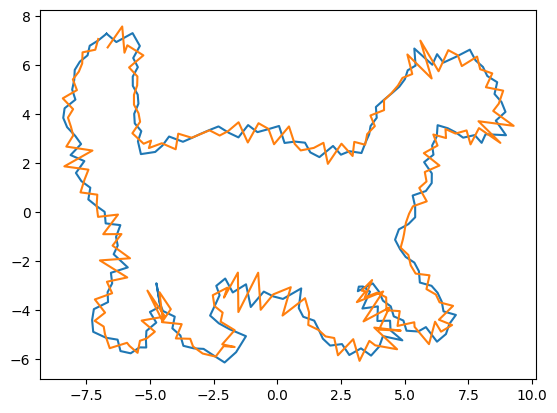

In [ ]:
# plot the new and old
#plt.figure()
#plt.plot(data_closed[:,0], data_closed[:,1], '-')
#plt.plot(X_new[:,0], X_new[:,1], '-')
#plt.show()


In [28]:
def smoothing_equation_1_10(data, LAMBDA=0.5, iterations=10, true_data=None):
    N = data.shape[0]

    # Construct the circulant matrix
    L = np.zeros(N)
    L[0] = -2
    L[1] = 1
    L[-1] = 1
    L = circulant(L)

    I = np.eye(N)
    
    # Case 1: iterations == 0
    if iterations == 0:
        # Perform one smoothing step
        X_new = (I + LAMBDA * L) @ data
        
        # Plot original data vs. the single-step smoothed data
        plt.figure()
        plt.plot(X_new[:, 0], X_new[:, 1], '-', label="Smoothed data (1 step)")
        
        # If ground truth is provided, plot it
        if true_data is not None:
            plt.plot(true_data[:, 0], true_data[:, 1], '-', label="True data")
        
        plt.title(f"Single-step smoothing with λ={LAMBDA}")
        plt.legend()
        plt.show()

        return X_new
    
    # Case 2: iterations > 0
    else:
        X_new = data.copy()  # Start from the original data

        fig, ax = plt.subplots()
        for i in range(iterations):
            X_new = (I + LAMBDA * L) @ X_new

            # Clear and update the plot at each iteration
            ax.clear()
            ax.plot(X_new[:, 0], X_new[:, 1], '-', label=f"Smoothed data (iteration {i+1})")
            
            # Plot ground truth if available
            if true_data is not None:
                ax.plot(true_data[:, 0], true_data[:, 1], '-', label="True data")
            
            ax.set_title(rf"Iteration {i+1} with $\lambda$={LAMBDA}")
            ax.legend()
            
            clear_output(wait=True)  # For Jupyter Notebook to update the figure
            display(fig)
        
        plt.close(fig)
        return X_new


#### Itterating over the data to smooth it with the initial lambda=0.5 and 20 iterations.

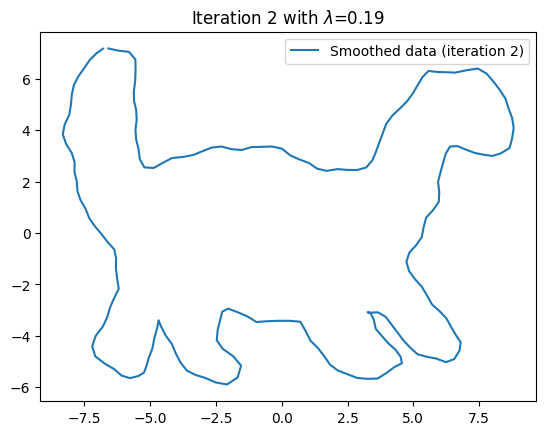

In [40]:
red = smoothing_equation_1_10(data=data, LAMBDA=0.19, iterations=2)

In [39]:
# calculate the distance between the x and y coordinates of the two curves

def calculate_distance(data1):
    # take the norm between x and y coordinates
    distances = np.linalg.norm(data1[1:] - data1[:-1], axis=1)
    # sum the distances
    distance = np.sum(distances)
    return distance

distance = calculate_distance(red)
print(distance)

79.92746634036195


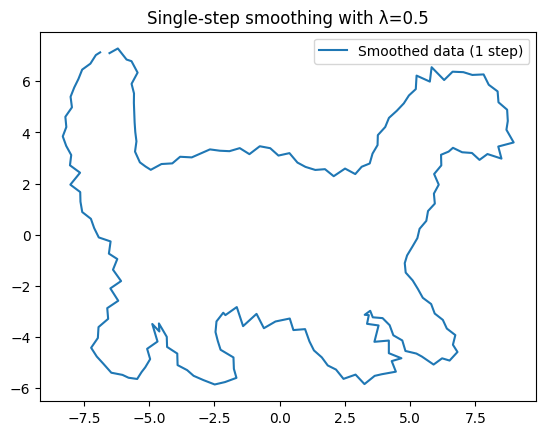

array([[-6.515867 ,  7.101031 ],
       [-6.196156 ,  7.2828865],
       [-5.8626855,  6.8506695],
       [-5.6733355,  6.7864995],
       [-5.439594 ,  6.3396675],
       [-5.6703615,  5.901077 ],
       [-5.577616 ,  5.526854 ],
       [-5.5817505,  5.155246 ],
       [-5.5662855,  4.781796 ],
       [-5.553547 ,  4.3963505],
       [-5.5280535,  4.0170545],
       [-5.4833835,  3.6524435],
       [-5.538113 ,  3.2520515],
       [-5.3515715,  2.831874 ],
       [-5.1366445,  2.670225 ],
       [-4.935105 ,  2.5404805],
       [-4.5254045,  2.76668  ],
       [-4.109316 ,  2.792036 ],
       [-3.8105255,  3.050691 ],
       [-3.3656595,  3.02604  ],
       [-3.0192475,  3.18204  ],
       [-2.667688 ,  3.3386455],
       [-2.2864025,  3.2866155],
       [-1.9202485,  3.269051 ],
       [-1.525678 ,  3.388129 ],
       [-1.1557305,  3.1526615],
       [-0.7592765,  3.4615865],
       [-0.358646 ,  3.3851875],
       [-0.043527 ,  3.0973425],
       [ 0.3783065,  3.1925485],
       [ 0

In [15]:
smoothing_equation_1_10(data, LAMBDA=0.5, iterations=0)

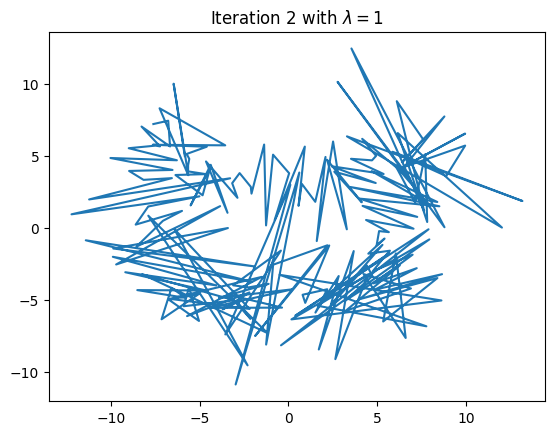

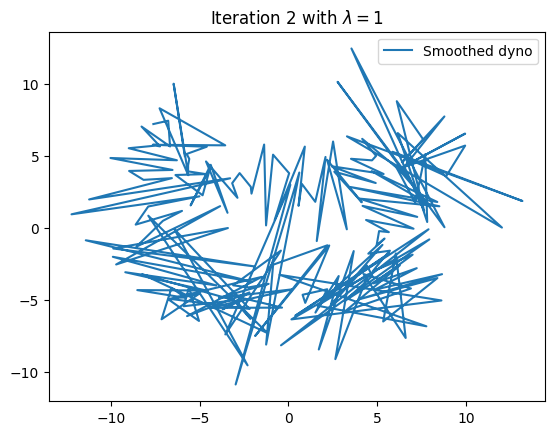

In [7]:
smoothing_equation_1_10(data, LAMBDA=1, iterations=2)

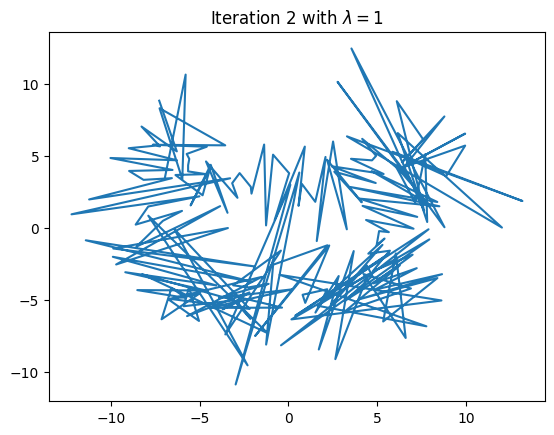

Plotting the ground truth


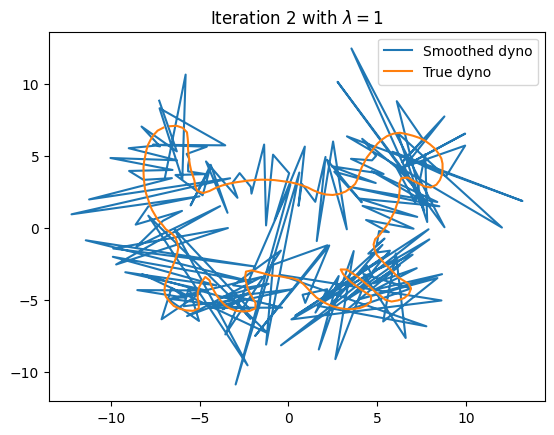

In [185]:
smoothing_equation_1_10(data, LAMBDA=1, iterations=2, true_data=true_data)

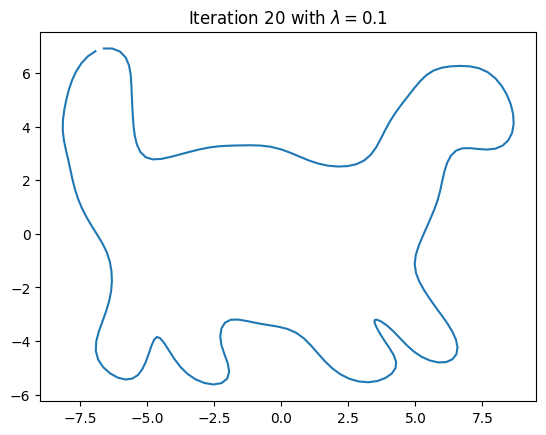

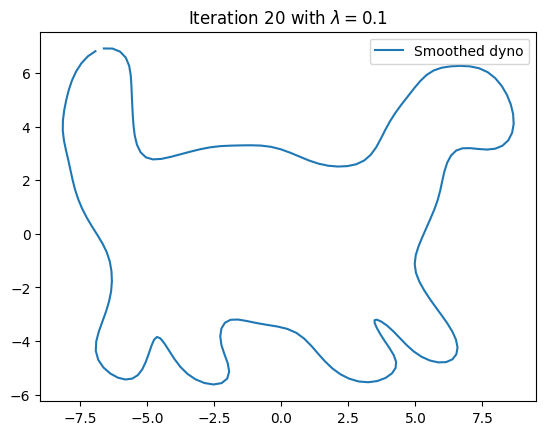

In [186]:
smoothing_equation_1_10(data, LAMBDA=0.1, iterations=20)

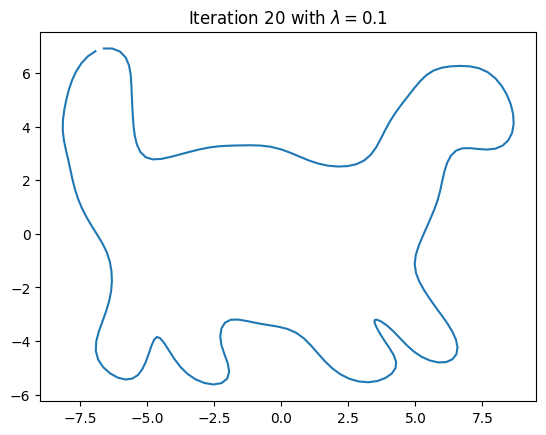

Plotting the ground truth


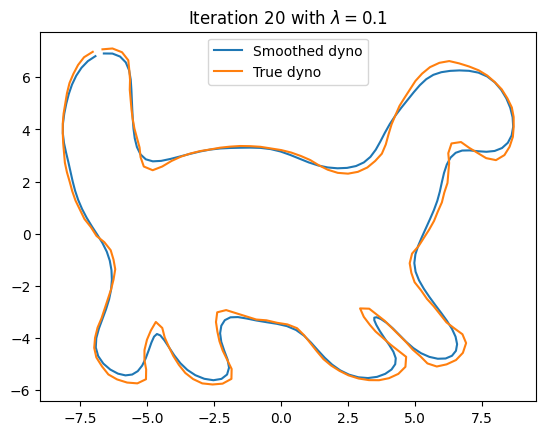

In [187]:
smoothing_equation_1_10(data, LAMBDA=0.1, iterations=20, true_data=true_data)

#### Implementing the quation 1.12 

$$ X_{new} = (I + \lambda L)^{-1} X $$

In [199]:
def smoothing_equation_1_12(data, LAMBDA=0.5, true_data=None):
    N = data.shape[0]
    L = np.zeros(N)
    L[0] = -2
    L[1] = 1
    L[-1] = 1
    L = circulant(L)
    I = np.eye(N)
    X_new = np.linalg.inv(I - LAMBDA*L) @ data

    plt.figure()
    plt.plot(X_new[:,0], X_new[:,1], '-')
    plt.title(rf"Smoothing with $\lambda=${LAMBDA}")
    plt.show()

    if true_data is not None:
        plt.figure()
        plt.plot(true_data[:,0], true_data[:,1], '-')
        plt.plot(X_new[:,0], X_new[:,1], '-')
        plt.title(rf"Smoothing with $\lambda=${LAMBDA}")
        plt.show()
    



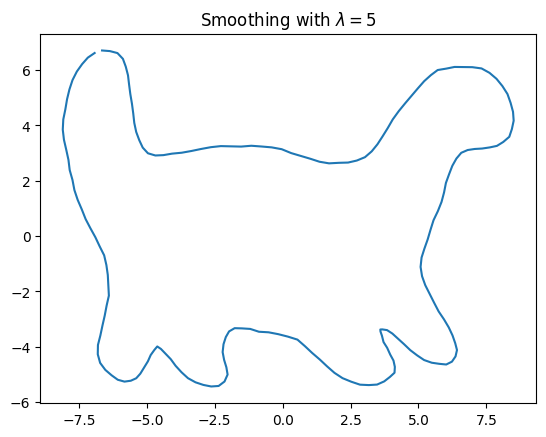

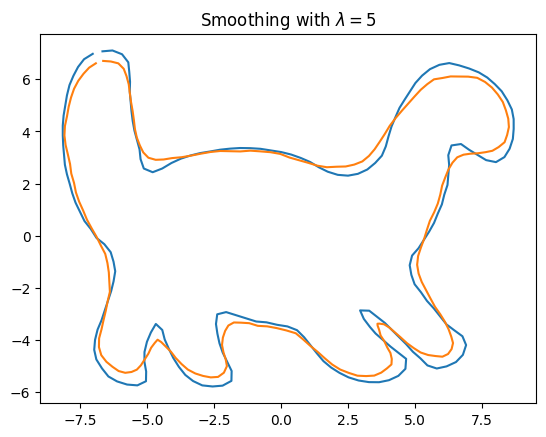

In [205]:
smoothing_equation_1_12(data, LAMBDA=5, true_data=true_data)

#### Impementing equation 1.13 

$$ X_{new} = (I + \lambda A - \beta B )^{-1} X $$

In [242]:
def smoothing_equation_1_13(data, LAMBDA=0.5, BETA=0.5, true_data=None):
    # A matrix 
    N = data.shape[0]
    A = np.zeros(N)
    A[0] = -2
    A[1] = 1
    A[-1] = 1
    A = circulant(L)

    # B matrix 
    B = np.zeros(N)
    B[0] = -6
    B[1] = 4
    B[2] = -1
    B[-1] = 4
    B[-2] = -1
    B = circulant(B)

    #print(B)

    I = np.eye(N)
    X_new = np.linalg.inv(I - LAMBDA * L - BETA * B) @ data

    # Plot results
    plt.figure()
    plt.plot(X_new[:, 0], X_new[:, 1], '-', label="Smoothed Curve")

    if true_data is not None:
        plt.plot(true_data[:, 0], true_data[:, 1], '-', label="Ground Truth", alpha=0.7)

    plt.title(rf"Smoothing with $\lambda={LAMBDA}$ and $\beta={BETA}$")
    plt.legend()
    plt.show()


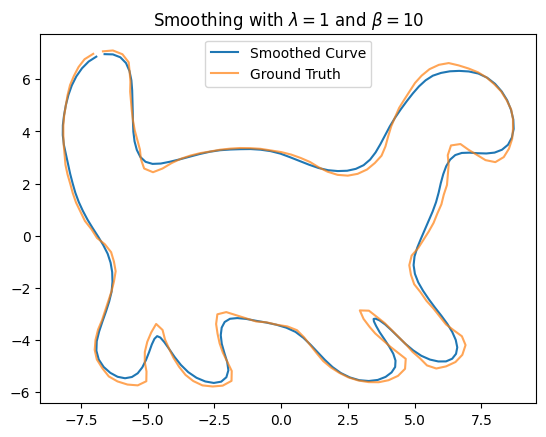

In [243]:
smoothing_equation_1_13(data, LAMBDA=1, BETA=10, true_data=true_data)

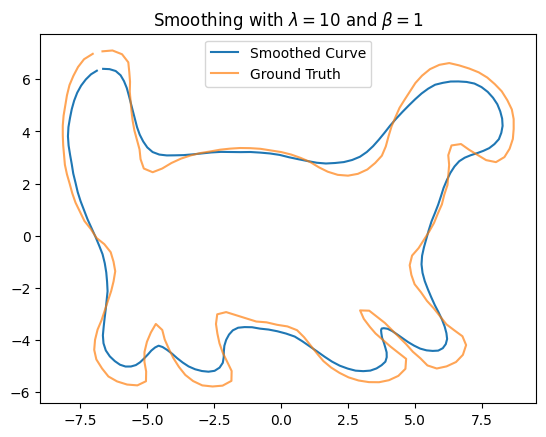

: 

In [244]:
smoothing_equation_1_13(data, LAMBDA=10, BETA=1, true_data=true_data)